---
## Decision Trees<br> <font size=3.4> Dataset:Fraud_check.csv<br><font size=2>Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
fraud= pd.read_csv('/Users/Ketan/Data Science/Assignments/Decision Tree/Fraud_check.csv')

In [3]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [24]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
#Changing the categorical variables into dummies.
df = pd.get_dummies(fraud)

#Converting the Target variable i.e. Taxable Income into Categorical (As mentioned in the problem statement)
df['Category'] = pd.cut(df['Taxable.Income'], 
                        bins=[0,30000, np.inf], 
                        labels=['Risky','Good'],
                        include_lowest=True)

In [5]:
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Category
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,Good
596,69967,55369,2,0,1,1,0,0,0,1,Good
597,47334,154058,0,1,0,1,0,0,0,1,Good
598,98592,180083,17,0,1,0,1,0,1,0,Good


In [8]:
x = df.iloc[:,1:10]
y = df.iloc[:,10]

In [9]:
x

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [10]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Category, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [13]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40)

In [29]:
y_train.value_counts()

Good     336
Risky     84
Name: Category, dtype: int64

In [28]:
y_test.value_counts()

Good     140
Risky     40
Name: Category, dtype: int64

### Building Decision Tree Classifier using Entropy Criteria<br><br> Iteration-1: Max Depth = 2

In [16]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model1.fit(x_train,y_train)
preds1 = model1.predict(x_test) # predicting on test data set 

print('Model leaves:',model1.get_n_leaves(),'\n','\n',
      pd.Series(preds1).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds1==y_test))

Model leaves: 4 
 
 Good    180
dtype: int64 
 
 Model Accuracy is: 0.7777777777777778


### Iteration-2: Max Depth = 3

In [17]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(x_train,y_train)
preds2 = model2.predict(x_test) # predicting on test data set 

print('Model leaves:',model2.get_n_leaves(),'\n','\n',
      pd.Series(preds2).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds2==y_test))

Model leaves: 7 
 
 Good     179
Risky      1
dtype: int64 
 
 Model Accuracy is: 0.7722222222222223


### Iteration-3: Max Depth = 4

In [18]:
model3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model3.fit(x_train,y_train)
preds3 = model3.predict(x_test) # predicting on test data set 

print('Model leaves:',model3.get_n_leaves(),'\n','\n',
      pd.Series(preds3).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds3==y_test))

Model leaves: 10 
 
 Good     177
Risky      3
dtype: int64 
 
 Model Accuracy is: 0.7611111111111111


### Iteration-4: Max Depth = 5

In [19]:
model4 = DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model4.fit(x_train,y_train)
preds4 = model4.predict(x_test) # predicting on test data set 

print('Model leaves:',model4.get_n_leaves(),'\n','\n',
      pd.Series(preds4).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds4==y_test))

Model leaves: 15 
 
 Good     178
Risky      2
dtype: int64 
 
 Model Accuracy is: 0.7666666666666667


### Iteration-5: Max Depth = 6

In [20]:
model5 = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model5.fit(x_train,y_train)
preds5 = model5.predict(x_test) # predicting on test data set 

print('Model leaves:',model5.get_n_leaves(),'\n','\n',
      pd.Series(preds5).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds5==y_test))

Model leaves: 20 
 
 Good     178
Risky      2
dtype: int64 
 
 Model Accuracy is: 0.7666666666666667


### Iteration-6: Max Depth = 7¶

In [21]:
model6 = DecisionTreeClassifier(criterion = 'entropy',max_depth=7)
model6.fit(x_train,y_train)
preds6 = model6.predict(x_test) # predicting on test data set 

print('Model leaves:',model6.get_n_leaves(),'\n','\n',
      pd.Series(preds6).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds6==y_test))

Model leaves: 27 
 
 Good     167
Risky     13
dtype: int64 
 
 Model Accuracy is: 0.7277777777777777


### Hence, the classifier model at the end of iteration 1 has the max accuracy i.e. 77.77%

In [ ]:
print(classification_report(preds1,y_test))

### We'll perform EDA to find outlier and see if that can increase the model accuracy

In [30]:
from sklearn.ensemble import IsolationForest

In [75]:
newdf= pd.get_dummies(fraud)

In [76]:
newdf

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [ ]:
# training the model
clf = IsolationForest(random_state=40,contamination=.01)
clf.fit(newdf)

In [ ]:
# predictions
y_pred_outliers = clf.predict(newdf)

In [79]:
#-1 for outliers and 1 for inliers.
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
newdf['scores']=clf.decision_function(newdf.iloc[:,0:10])
newdf['anomaly']=clf.predict(newdf.iloc[:,0:10])
newdf

In [81]:
#Print the outlier data points
newdf[newdf['anomaly']==-1]

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,scores,anomaly
34,12514,183767,1,0,1,1,0,0,0,1,-0.112257,-1
280,17783,33184,1,1,0,1,0,0,1,0,-0.117089,-1
409,83094,163058,1,1,0,0,0,1,1,0,-0.106161,-1
414,97980,27300,1,1,0,1,0,0,0,1,-0.112210,-1
474,99128,80729,0,0,1,1,0,0,1,0,-0.109884,-1
541,12453,191874,30,0,1,1,0,0,0,1,-0.110331,-1


In [82]:
df1 = newdf.drop([34,280,409,414,474,541],axis=0).reset_index(drop=True)
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,scores,anomaly
0,68833,50047,10,1,0,0,0,1,0,1,-0.036306,1
1,33700,134075,18,0,1,1,0,0,0,1,-0.038832,1
2,36925,160205,30,1,0,0,1,0,0,1,-0.092600,1
3,50190,193264,15,0,1,0,0,1,0,1,-0.033847,1
4,81002,27533,28,1,0,0,1,0,1,0,-0.068886,1
...,...,...,...,...,...,...,...,...,...,...,...,...
589,76340,39492,7,0,1,1,0,0,0,1,-0.052651,1
590,69967,55369,2,0,1,1,0,0,0,1,-0.047475,1
591,47334,154058,0,1,0,1,0,0,0,1,-0.077038,1
592,98592,180083,17,0,1,0,1,0,1,0,-0.097262,1


In [83]:
#Converting the Target variable i.e. Taxable Income into Categorical (As mentioned in the problem statement)
df1['Category'] = pd.cut(df1['Taxable.Income'], 
                        bins=[0,30000, np.inf], 
                        labels=['Risky','Good'],
                        include_lowest=True)

df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,scores,anomaly,Category
0,68833,50047,10,1,0,0,0,1,0,1,-0.036306,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,-0.038832,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,-0.092600,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,-0.033847,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,-0.068886,1,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,76340,39492,7,0,1,1,0,0,0,1,-0.052651,1,Good
590,69967,55369,2,0,1,1,0,0,0,1,-0.047475,1,Good
591,47334,154058,0,1,0,1,0,0,0,1,-0.077038,1,Good
592,98592,180083,17,0,1,0,1,0,1,0,-0.097262,1,Good


In [84]:
x1 = df1.iloc[:,1:10]
y1 = df1.iloc[:,12]

In [85]:
x1

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
589,39492,7,0,1,1,0,0,0,1
590,55369,2,0,1,1,0,0,0,1
591,154058,0,1,0,1,0,0,0,1
592,180083,17,0,1,0,1,0,1,0


In [86]:
y1

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
589    Good
590    Good
591    Good
592    Good
593    Good
Name: Category, Length: 594, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [87]:
# Splitting data into training and testing data set
x_train1, x_test1,y_train1,y_test1 = train_test_split(x1,y1, test_size=0.25,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria<br><br> Since last time the iteration 1 and 2 had the highest accuracy, so we'll make new models with this new dataframe, i.e. with max depth = 2 & 3

In [112]:
model11 = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model11.fit(x_train,y_train)
preds11 = model11.predict(x_test) # predicting on test data set 

print('Model leaves:',model11.get_n_leaves(),'\n','\n',
      pd.Series(preds11).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds11==y_test))

Model leaves: 4 
 
 Good    180
dtype: int64 
 
 Model Accuracy is: 0.7777777777777778


In [113]:
model12 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model12.fit(x_train,y_train)
preds12 = model12.predict(x_test) # predicting on test data set 

print('Model leaves:',model12.get_n_leaves(),'\n','\n',
      pd.Series(preds12).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds12==y_test))

Model leaves: 7 
 
 Good     179
Risky      1
dtype: int64 
 
 Model Accuracy is: 0.7722222222222223


### Since the accuracy hasn't improved, we can finalise the model 1 as our final model<br><br>Building Decision Tree Classifier (CART) using Gini Criteria

In [90]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=2)

In [91]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [92]:
#Prediction and computing the accuracy
predG=model_gini.predict(x_test)
print('Model Accuracy is:',np.mean(predG==y_test))

Model Accuracy is: 0.7777777777777778


### Same Accuracy is achieved using CART as well<br><br>Let's Visualize both the Decision Trees

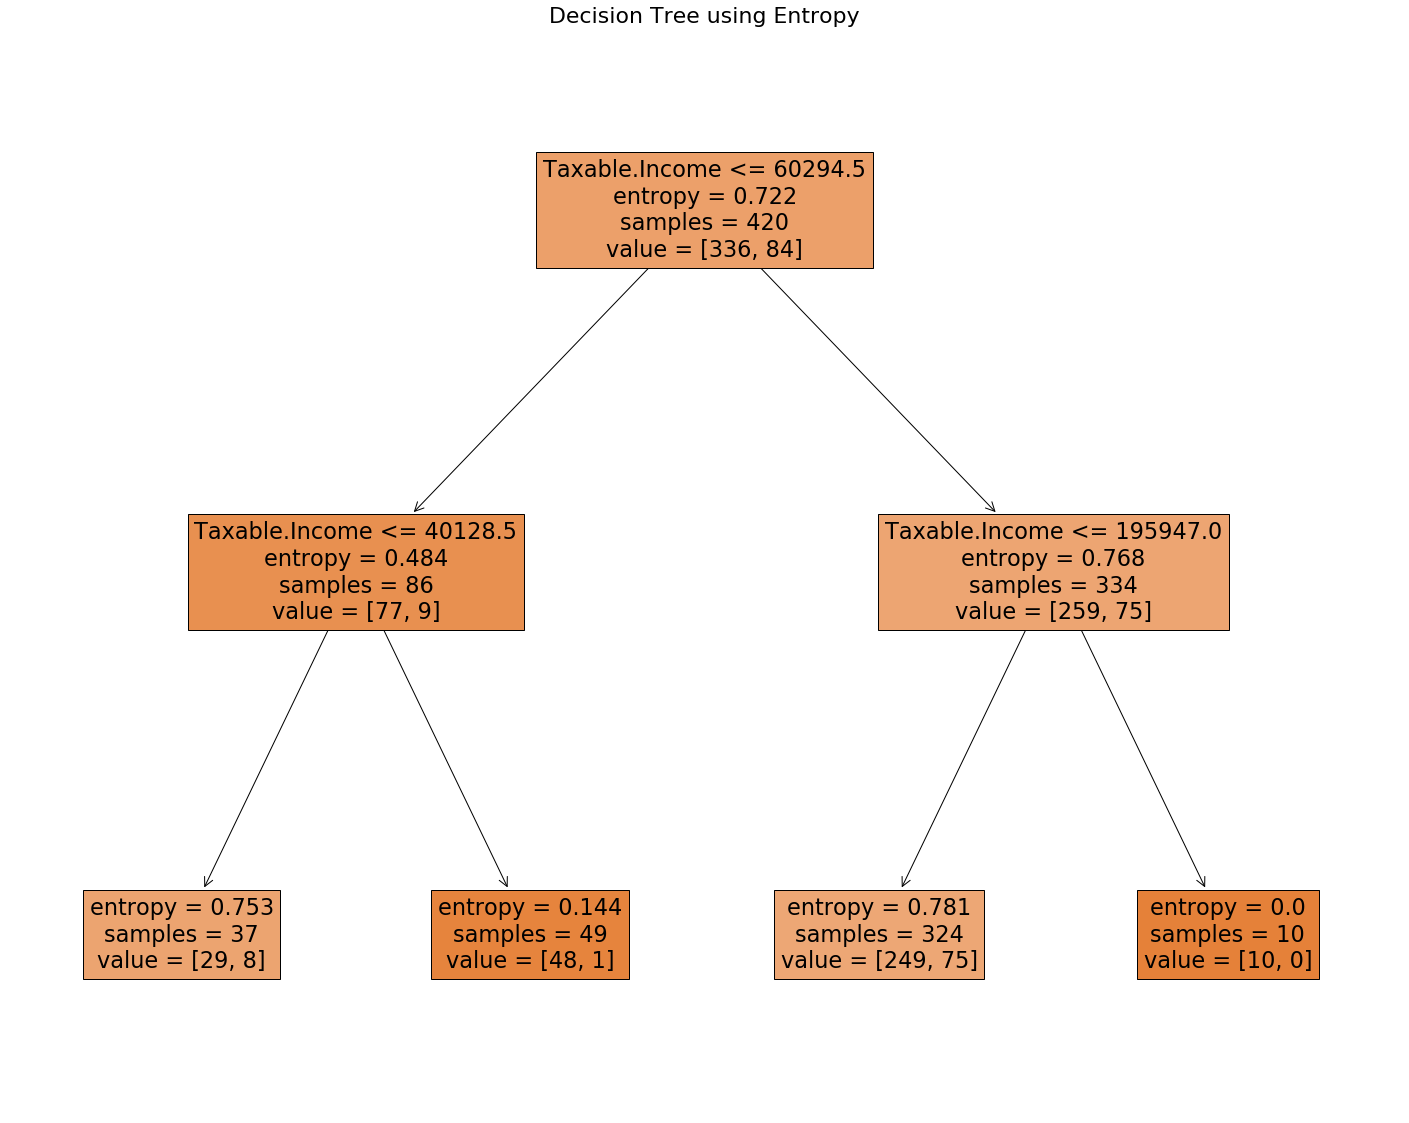

In [114]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model1,
                     feature_names= ['Taxable.Income','City.Population','Work.Experience','Undergrad_NO',
                                     'Undergrad_YES','Marital.Status_Divorced','Marital.Status_Married',
                                     'Marital.Status_Single','Urban_NO','Urban_YES','Category'], filled=True)
plt.title('Decision Tree using Entropy',fontsize=22)
plt.savefig('Fraud Check DT_Entropy.png')

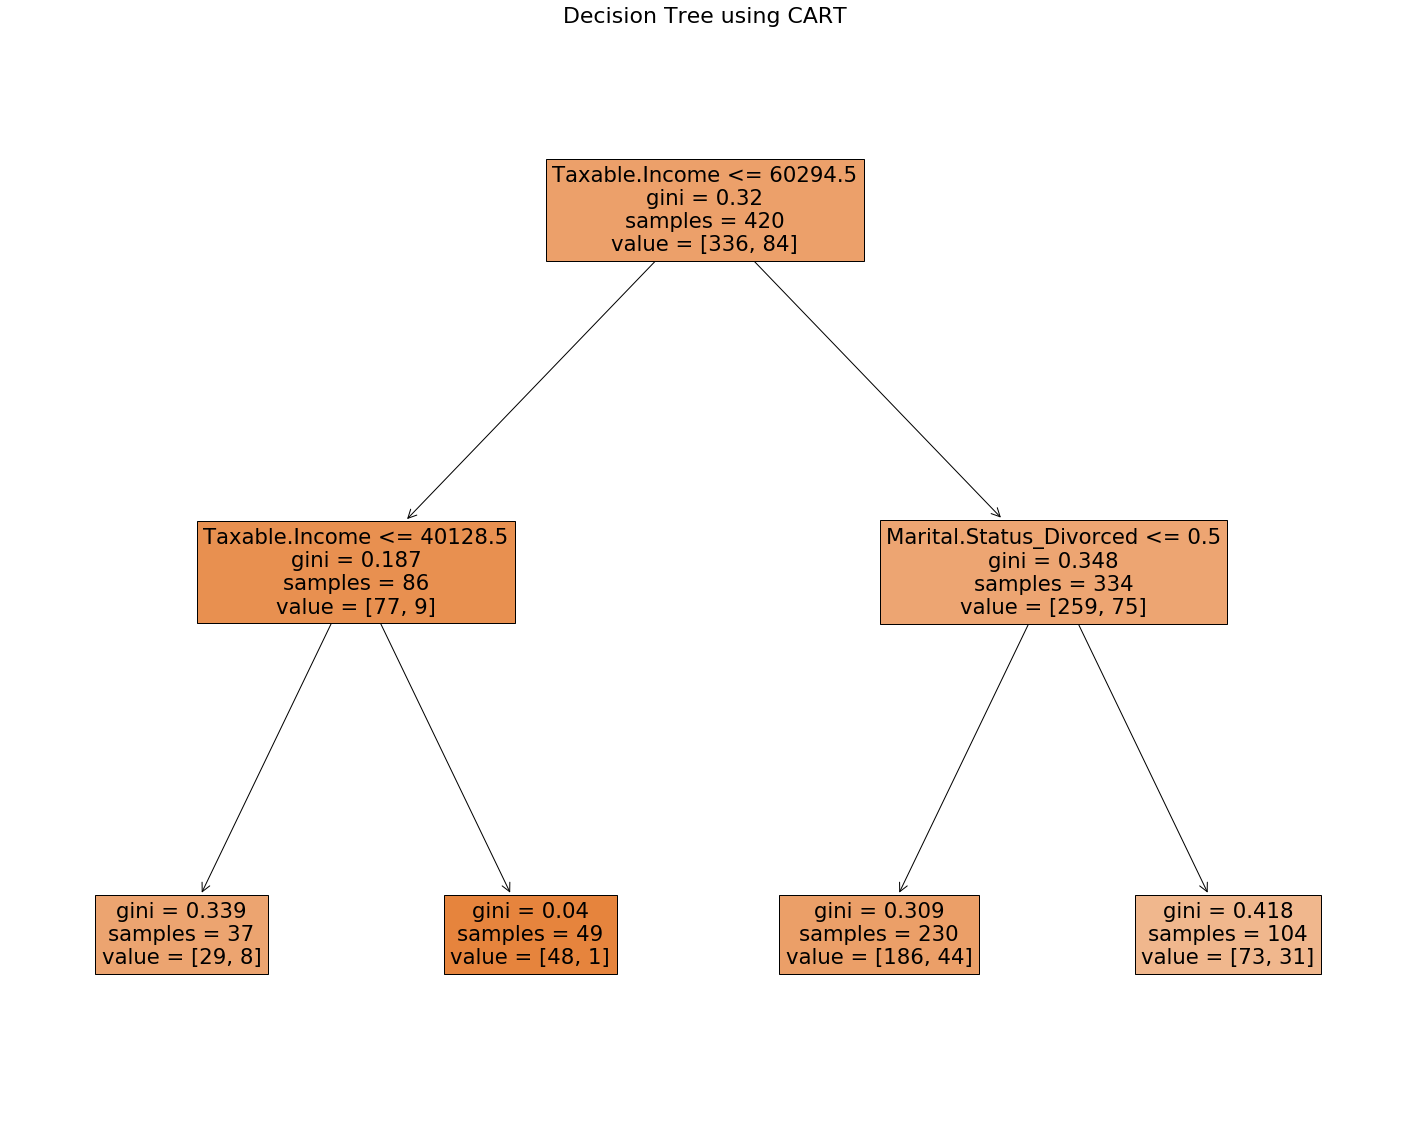

In [116]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini,
                     feature_names= ['Taxable.Income','City.Population','Work.Experience','Undergrad_NO',
                                     'Undergrad_YES','Marital.Status_Divorced','Marital.Status_Married',
                                     'Marital.Status_Single','Urban_NO','Urban_YES','Category'], filled=True)
plt.title('Decision Tree using CART',fontsize=22)
plt.savefig('Fraud Check DT_CART.png')